# Data Preprocess (MNIST)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

## 데이터 불러오기

In [4]:
from tensorflow.keras import datasets

In [6]:
mnist = datasets.mnist
mnist

<module 'tensorflow.keras.datasets.mnist' from 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

In [7]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Image Dataset 들여다 보기

In [10]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
train_x
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 시각화, 확인해보기

In [16]:
# 이미지 하나만 뽑기
image = train_x[0]
image.shape

# (28, 28)  <-- 28 x 28 크기의 이미지, Graysacle  (0 ~ 255)

# (28, 28, 3)  <-- RGB 색상채널이 있는 경우.


(28, 28)

In [17]:
np.max(image), np.min(image)

(255, 0)

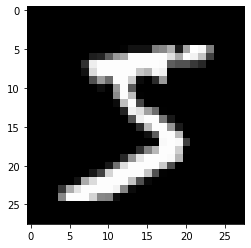

In [18]:
plt.imshow(image, 'gray')
plt.show()

## Channel 관련
[Batch Size, Height, Width, Channel]

- Channel 이 있어야 한다  (없으면 만들어 주어야 한다)
    - Grayscale 이면 1
    - RGB 이면 3 

In [19]:
train_x.shape

(60000, 28, 28)

In [20]:
# 뒤에 차원 하나 추가해야 한다.

### 데이터 차원수 늘리기 **(데이터 차원 변경하는 작업은 많이 하는 작업이다)**
    - 방법1 numpy 의 expand_dims()
    - 방법2 np.newaxis 사용
    - 방법3 tensorflow 의 expand_dims()
    - 방법4 tensorflow 의 newaxis
    - 방법5 reshape() 

#### 방법1 

In [21]:
expanded_data = np.expand_dims(train_x, 0)   # 0 : 새로운 차원을 맨 앞 (axis = 0) 에 추가
expanded_data.shape

(1, 60000, 28, 28)

In [22]:
expanded_data = np.expand_dims(train_x, -1)   # -1 : 새로운 차원을 맨 뒤 (axis = -1) 에 추가
expanded_data.shape

(60000, 28, 28, 1)

In [24]:
expanded_data = np.expand_dims(np.expand_dims(train_x, -1), 0)
expanded_data.shape

(1, 60000, 28, 28, 1)

#### 방법2

In [28]:
expanded_data = train_x[:, :, : , np.newaxis] 
expanded_data.shape

(60000, 28, 28, 1)

#### 방법3

In [29]:
new_train_x = tf.expand_dims(train_x, -1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

#### 방법4

In [30]:
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1)

#### 방법5

In [32]:
reshaped = train_x.reshape([60000, 28, 28, 1])
reshaped.shape

(60000, 28, 28, 1)

In [33]:
# 이번 예제에선 맨 뒤에 차원을 추가

In [34]:
train_x = np.expand_dims(train_x, -1)
train_x.shape

(60000, 28, 28, 1)

### 다시 시각화
channel 차원 추가후

In [36]:
train_x[0].shape

(28, 28, 1)

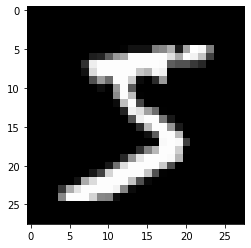

In [37]:
plt.imshow(train_x[0], 'gray')
plt.show()

## 차원 축소는?
- np.squeeze()
- .reshape

In [39]:
img = train_x[0]
img.shape

(28, 28, 1)

In [41]:
img.reshape(28, 28).shape

(28, 28)

In [42]:
np.squeeze(img).shape

(28, 28)

# Label Data 들여다보기

In [44]:
train_y.shape  # 학습용 60,000개  1차원 데이터

(60000,)

In [49]:
np.unique(train_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [51]:
train_y[0]   # 첫번째 데이터

5

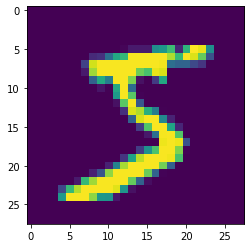

In [52]:
plt.imshow(train_x[0])
plt.show()

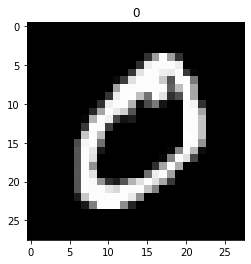

In [54]:
# label 로 함께 시각화

plt.title(train_y[1])  # 두번째 데이터
plt.imshow(train_x[1], 'gray')
plt.show()

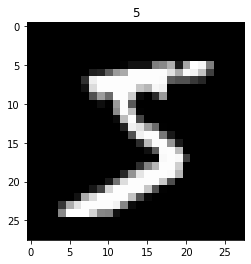

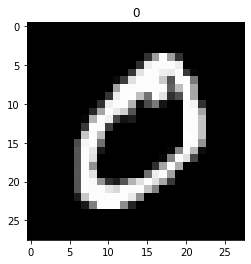

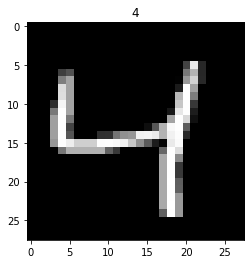

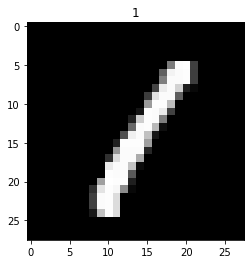

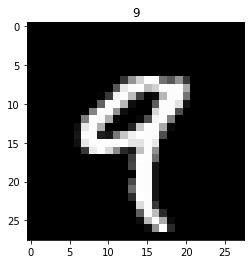

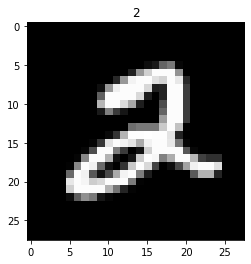

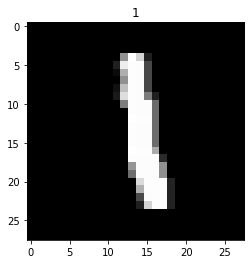

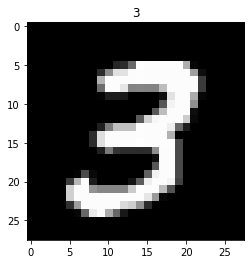

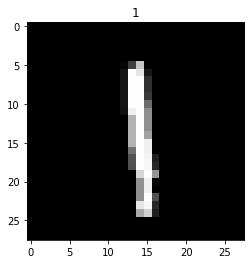

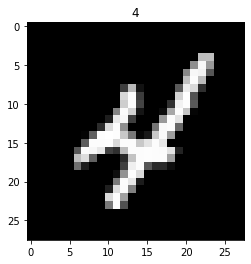

In [55]:
# 첫 10개의 data + label
for i in range(10):
    plt.title(train_y[i])
    plt.imshow(train_x[i], 'gray')
    plt.show()

# OneHot Encoding

머신러닝 결과로 나올수 있는 형태로 변환된 label 을 주어야 한다.

지금 하고자 하는 것은 classification 이다. 즉 분류판정 을 해주어야 한다.

ex) 개 - 1, 고양이 - 0  컴퓨터 연산으로 나올수 있는 형태로 바꾸어 주어야 한다

인코딩 예 (One hot encoding)

### [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]   

↑ 10자리 -> 10개의 class 표현 가능

In [ ]:
# 0  => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1  => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 2  => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 3  => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# 4  => [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# 5  => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 6  => [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
# 7  => [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# 8  => [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
# 9  => [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [57]:
# 함수를 만들어서도 인코딩 가능..
# TF 의 keras 에서 원하는 인코딩으로 바꾸어주는 기능 제공

from tensorflow.keras.utils import to_categorical

In [58]:
to_categorical(0, 10)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [59]:
to_categorical(3, 5)

array([0., 0., 0., 1., 0.], dtype=float32)

#### label 확인해서 to_categorical 사용

In [60]:
label_onehot = to_categorical(train_y[0], num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### One hot encoding  변환한것 + 시각화

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


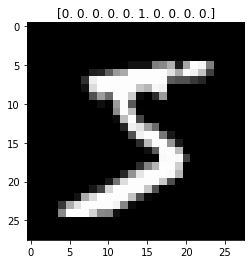

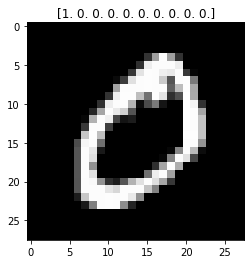

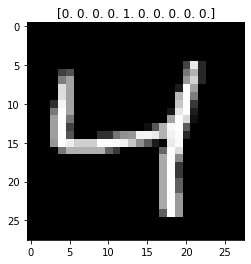

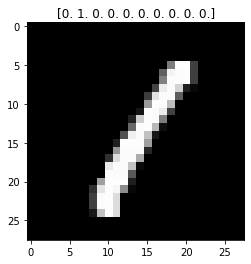

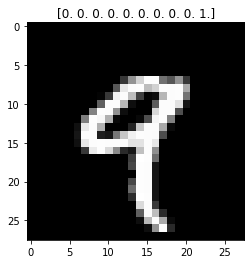

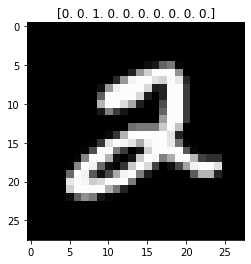

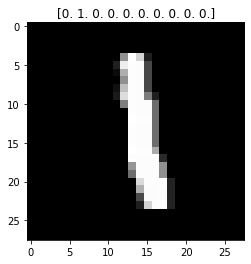

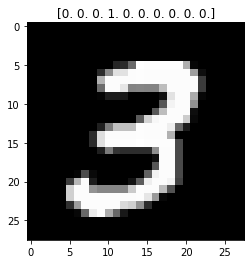

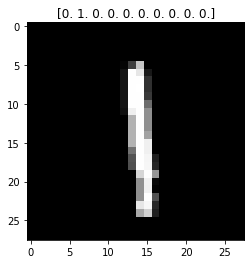

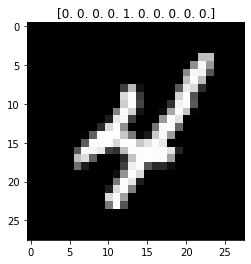

In [61]:
# 첫 10개의 data + label
for i in range(10):
    plt.title(to_categorical(train_y[i], num_classes=10))
    plt.imshow(train_x[i], 'gray')
    plt.show()